# Notebook 2: Data Engineering

**Purpose**: Data type casting, feature normalization, and train-test split creation.

**Inputs**:
- `cleaned_data.csv` from Notebook 1

**Outputs**:
- `engineered_train.csv` → `data/splits/`
- `engineered_test.csv` → `data/splits/`
- `split_metadata.json` → `results/`
- `scaler.pkl` → `models/`

---

In [18]:
# Imports
import sys
sys.path.append('..')

import numpy as np
import pandas as pd
import json
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import joblib

# Set random seed
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

# Paths
BASE_DIR = Path('.').resolve().parent
PROCESSED_DIR = BASE_DIR / 'data' / 'processed'
SPLITS_DIR = BASE_DIR / 'data' / 'splits'
MODELS_DIR = BASE_DIR / 'models'
RESULTS_DIR = BASE_DIR / 'results'
FIGURES_DIR = BASE_DIR / 'figures'

# Create directories
for d in [SPLITS_DIR, MODELS_DIR, RESULTS_DIR, FIGURES_DIR]:
    d.mkdir(parents=True, exist_ok=True)

# Configuration
TARGET_COLUMN = 'Class'
TEST_SIZE = 0.2

print(f"Random Seed: {RANDOM_SEED}")
print(f"Test Size: {TEST_SIZE}")

Random Seed: 42
Test Size: 0.2


## 1. Load Cleaned Data

In [19]:
# Load data from Notebook 1
input_path = PROCESSED_DIR / 'cleaned_data.csv'
df = pd.read_csv(input_path)

print(f"Loaded data shape: {df.shape}")
print(f"\nClass distribution:")
print(df[TARGET_COLUMN].value_counts())

Loaded data shape: (2000, 31)

Class distribution:
Class
0    1900
1     100
Name: count, dtype: int64


In [20]:
# Display first few rows
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,121627.0,-0.215527,-0.106014,-0.522913,-0.676357,1.663811,-0.734155,1.016395,-0.445126,0.308082,...,0.208343,1.008589,0.373927,0.100324,-0.061636,-0.249046,-0.130277,-0.252889,8.15,0
1,35247.0,0.842693,-0.389576,0.248623,1.469954,-0.516843,-0.284754,0.204810,-0.000116,0.147620,...,0.013008,-0.218203,-0.240607,0.334796,0.615579,-0.374654,-0.017613,0.036383,175.00,0
2,43868.0,-1.579422,-5.751848,-3.278840,-0.414363,0.122505,3.733462,1.251208,0.290314,-1.082255,...,1.057360,-0.647728,-1.596564,1.137756,0.367977,-0.218914,-0.306001,0.273031,1594.74,0
3,120506.0,1.576789,-1.408677,0.412871,0.594289,-0.738457,2.591822,-1.713853,0.905358,2.501833,...,0.254708,1.231420,0.038571,-1.564265,-0.366401,-0.054603,0.142153,-0.035391,97.83,0
4,124578.0,1.521502,-0.905271,-0.281751,1.363926,-0.568407,0.500129,-0.490047,0.090917,1.036589,...,0.205227,0.285126,0.062703,0.411392,-0.334847,-0.770350,0.043756,0.024676,227.70,0


## 2. Data Type Casting

In [21]:
# Check current data types
print("Current Data Types:")
print(df.dtypes)

Current Data Types:
Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object


In [22]:
# Ensure target is integer
df[TARGET_COLUMN] = df[TARGET_COLUMN].astype(int)

# Ensure features are float64
feature_cols = [col for col in df.columns if col != TARGET_COLUMN]
for col in feature_cols:
    df[col] = df[col].astype(np.float64)

print("\nData types after casting:")
print(df.dtypes.value_counts())


Data types after casting:
float64    30
int64       1
Name: count, dtype: int64


## 3. Feature-Target Separation

In [23]:
# Separate features and target
X = df.drop(columns=[TARGET_COLUMN])
y = df[TARGET_COLUMN]

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nFeature columns: {list(X.columns)}")

Features shape: (2000, 30)
Target shape: (2000,)

Feature columns: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']


## 4. Stratified Train-Test Split

In [24]:
# Stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=TEST_SIZE, 
    random_state=RANDOM_SEED, 
    stratify=y  # Maintain class ratio
)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print(f"\nTraining class distribution:")
print(y_train.value_counts())
print(f"\nTest class distribution:")
print(y_test.value_counts())

Training set: 1600 samples
Test set: 400 samples

Training class distribution:
Class
0    1520
1      80
Name: count, dtype: int64

Test class distribution:
Class
0    380
1     20
Name: count, dtype: int64


In [25]:
# Verify stratification
train_ratio = y_train.mean() * 100
test_ratio = y_test.mean() * 100

print(f"Training anomaly ratio: {train_ratio:.2f}%")
print(f"Test anomaly ratio: {test_ratio:.2f}%")
print(f"\n✅ Stratification successful!" if abs(train_ratio - test_ratio) < 1 else "⚠️ Stratification mismatch!")

Training anomaly ratio: 5.00%
Test anomaly ratio: 5.00%

✅ Stratification successful!


## 5. Feature Normalization (StandardScaler)

In [26]:
# Check feature distributions before scaling
print("Feature Statistics (Before Scaling):")
print(f"Mean range: [{X_train.mean().min():.4f}, {X_train.mean().max():.4f}]")
print(f"Std range: [{X_train.std().min():.4f}, {X_train.std().max():.4f}]")

Feature Statistics (Before Scaling):
Mean range: [-0.3689, 93655.3938]
Std range: [0.3090, 48065.5942]


In [27]:
# Apply StandardScaler
scaler = StandardScaler()

# Fit on training data only
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print("\nFeature Statistics (After Scaling):")
print(f"Mean range: [{X_train_scaled.mean().min():.4f}, {X_train_scaled.mean().max():.4f}]")
print(f"Std range: [{X_train_scaled.std().min():.4f}, {X_train_scaled.std().max():.4f}]")


Feature Statistics (After Scaling):
Mean range: [-0.0000, 0.0000]
Std range: [1.0003, 1.0003]


C:\Users\mostr\AppData\Local\Temp\ipykernel_21436\2078787974.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0].boxplot([X_train[col] for col in sample_cols], labels=sample_cols)
C:\Users\mostr\AppData\Local\Temp\ipykernel_21436\2078787974.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1].boxplot([X_train_scaled[col] for col in sample_cols], labels=sample_cols)


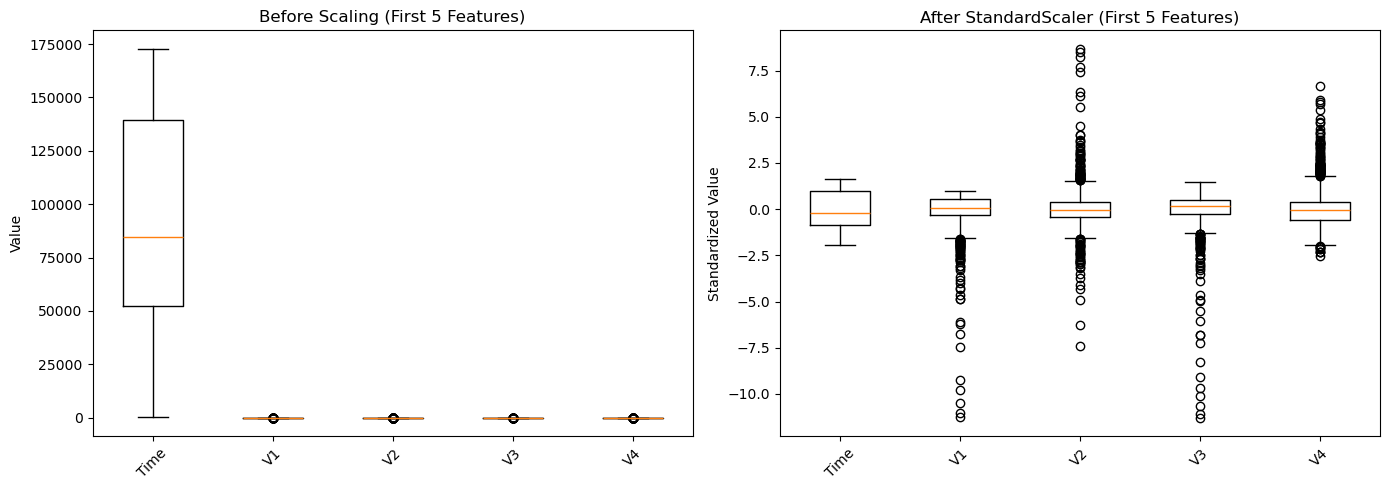

In [28]:
# Visualize scaling effect
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Before scaling (using first 5 features)
sample_cols = X_train.columns[:5]
axes[0].boxplot([X_train[col] for col in sample_cols], labels=sample_cols)
axes[0].set_title('Before Scaling (First 5 Features)')
axes[0].set_ylabel('Value')
axes[0].tick_params(axis='x', rotation=45)

# After scaling
axes[1].boxplot([X_train_scaled[col] for col in sample_cols], labels=sample_cols)
axes[1].set_title('After StandardScaler (First 5 Features)')
axes[1].set_ylabel('Standardized Value')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig(FIGURES_DIR / 'scaling_comparison.png', dpi=150)
plt.show()

## 6. Save Outputs

In [29]:
# Combine features with target for saving
train_df = X_train_scaled.copy()
train_df[TARGET_COLUMN] = y_train.values

test_df = X_test_scaled.copy()
test_df[TARGET_COLUMN] = y_test.values

print(f"Training DataFrame shape: {train_df.shape}")
print(f"Test DataFrame shape: {test_df.shape}")

Training DataFrame shape: (1600, 31)
Test DataFrame shape: (400, 31)


In [30]:
# Save train/test splits
train_path = SPLITS_DIR / 'engineered_train.csv'
test_path = SPLITS_DIR / 'engineered_test.csv'

train_df.to_csv(train_path, index=False)
test_df.to_csv(test_path, index=False)

print(f"✅ Saved training data to: {train_path}")
print(f"✅ Saved test data to: {test_path}")

✅ Saved training data to: C:\Users\mostr\OneDrive\Documents\GitHub\Proj\Anomaly-detection-in-finance-using-QML\data\splits\engineered_train.csv
✅ Saved test data to: C:\Users\mostr\OneDrive\Documents\GitHub\Proj\Anomaly-detection-in-finance-using-QML\data\splits\engineered_test.csv


In [31]:
# Save scaler
scaler_path = MODELS_DIR / 'scaler.pkl'
joblib.dump(scaler, scaler_path)
print(f"✅ Saved scaler to: {scaler_path}")

✅ Saved scaler to: C:\Users\mostr\OneDrive\Documents\GitHub\Proj\Anomaly-detection-in-finance-using-QML\models\scaler.pkl


In [35]:
# Create and save split metadata
split_metadata = {
    "random_seed": RANDOM_SEED,
    "test_size": TEST_SIZE,
    "stratified": True,
    "target_column": TARGET_COLUMN,
    "training_samples": int(len(train_df)),
    "test_samples": int(len(test_df)),
    "training_class_distribution": {
        "normal": int((y_train == 0).sum()),
        "anomaly": int((y_train == 1).sum()),
        "anomaly_ratio": round(y_train.mean() * 100, 2)
    },
    "test_class_distribution": {
        "normal": int((y_test == 0).sum()),
        "anomaly": int((y_test == 1).sum()),
        "anomaly_ratio": round(y_test.mean() * 100, 2)
    },
    "scaler": {
        "type": "StandardScaler",
        "fit_on": "training_data_only"
    },
    "feature_count": len(feature_cols),
    "feature_names": feature_cols
}

metadata_path = RESULTS_DIR / 'split_metadata.json'
with open(metadata_path, 'w') as f:
    json.dump(split_metadata, f, indent=2)

print(f"✅ Saved split metadata to: {metadata_path}")

✅ Saved split metadata to: C:\Users\mostr\OneDrive\Documents\GitHub\Proj\Anomaly-detection-in-finance-using-QML\results\split_metadata.json


In [33]:
# Display metadata
print("\nSplit Metadata:")
print("=" * 50)
print(json.dumps(split_metadata, indent=2))


Split Metadata:
{
  "random_seed": 42,
  "test_size": 0.2,
  "stratified": true,
  "target_column": "Class",
  "training_samples": 1600,
  "test_samples": 400,
  "training_class_distribution": {
    "normal": 1520,
    "anomaly": 80,
    "anomaly_ratio": 5.0
  },
  "test_class_distribution": {
    "normal": 380,
    "anomaly": 20,
    "anomaly_ratio": 5.0
  },
  "scaler": {
    "type": "StandardScaler",
    "fit_on": "training_data_only"
  },
  "feature_count": 30,
  "feature_names": [
    "Time",
    "V1",
    "V2",
    "V3",
    "V4",
    "V5",
    "V6",
    "V7",
    "V8",
    "V9",
    "V10",
    "V11",
    "V12",
    "V13",
    "V14",
    "V15",
    "V16",
    "V17",
    "V18",
    "V19",
    "V20",
    "V21",
    "V22",
    "V23",
    "V24",
    "V25",
    "V26",
    "V27",
    "V28",
    "Amount"
  ]
}


## 7. Verification

In [34]:
# Verify saved files
train_verify = pd.read_csv(SPLITS_DIR / 'engineered_train.csv')
test_verify = pd.read_csv(SPLITS_DIR / 'engineered_test.csv')
scaler_verify = joblib.load(MODELS_DIR / 'scaler.pkl')

print("Verification:")
print(f"  Training shape: {train_verify.shape}")
print(f"  Test shape: {test_verify.shape}")
print(f"  Scaler type: {type(scaler_verify).__name__}")
print(f"  Total samples: {len(train_verify) + len(test_verify)}")
print("\n✅ Notebook 2 Complete!")

Verification:
  Training shape: (1600, 31)
  Test shape: (400, 31)
  Scaler type: StandardScaler
  Total samples: 2000

✅ Notebook 2 Complete!
